In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import pickle



In [2]:
%store -r X_train
X_train = X_train
%store -r y_train
y_train = y_train

%store -r X_val
X_val = X_val
%store -r y_val
y_val = y_val

%store -r X_test
X_test = X_test
%store -r y_test
y_test = y_test

%store -r drop_columns
drop_columns = drop_columns

%store -r X_train_full
X_train_full = X_train_full

In [3]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    kf = KFold(n_splits=5, shuffle=True, random_state=4)
    
    cross_val_r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    cross_val_rmse = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
    
    print(f"Training CV R2: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")
    
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    r2_val = r2_score(y_val, y_val_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    
    print(f"Training R2: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
    print(f"Validation R2: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

Testing each model

Linear Regressor

In [4]:
model = Pipeline ([
    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

evaluate_model(model, X_train, y_train, X_val, y_val)

Training CV R2: 0.9594, Training CV RMSE: 1.9509
Training R2: 0.9598, Training RMSE: 1.9474
Validation R2: 0.9635, Validation RMSE: 1.7689


Decision Tree Regressor

In [5]:
model = Pipeline ([
    ("dec_tree", DecisionTreeRegressor())
])

evaluate_model(model, X_train, y_train, X_val, y_val)

Training CV R2: 0.9400, Training CV RMSE: 2.2924
Training R2: 1.0000, Training RMSE: 0.0000
Validation R2: 0.9514, Validation RMSE: 2.0407


Decision Tree Regressor model is overfit

Random Forest Regressor

In [6]:
model = Pipeline ([
    ("rand_forest", RandomForestRegressor())
])

evaluate_model(model, X_train, y_train, X_val, y_val)

Training CV R2: 0.9710, Training CV RMSE: 1.6292
Training R2: 0.9962, Training RMSE: 0.6015
Validation R2: 0.9765, Validation RMSE: 1.4193


Support Vector 

In [7]:
model = Pipeline ([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

evaluate_model(model, X_train, y_train, X_val, y_val)

Training CV R2: 0.9039, Training CV RMSE: 3.0004
Training R2: 0.9252, Training RMSE: 2.6556
Validation R2: 0.9086, Validation RMSE: 2.7980


Support Vector is a very slightly overfit, but over all a good fit

XGBOOST

In [8]:
model = Pipeline ([
    ("scaler", StandardScaler()),
    ("xgboost", XGBRegressor())
])

evaluate_model(model, X_train, y_train, X_val, y_val)

Training CV R2: 0.9695, Training CV RMSE: 1.6896
Training R2: 0.9997, Training RMSE: 0.1647
Validation R2: 0.9744, Validation RMSE: 1.4799


XGBOOST is also very slightly overfil, but still a good fit over all

CAT Boost

In [9]:
model = Pipeline ([
    ("catboost", CatBoostRegressor(verbose=0))
])

evaluate_model(model, X_train, y_train, X_val, y_val)

Training CV R2: 0.9698, Training CV RMSE: 1.6802
Training R2: 0.9956, Training RMSE: 0.6465
Validation R2: 0.9750, Validation RMSE: 1.4625


CAT Boost model is good fit

ADA Boost

In [10]:
model = Pipeline ([
    ("adaboost", AdaBoostRegressor())
])

evaluate_model(model, X_train, y_train, X_val, y_val)

Training CV R2: 0.9398, Training CV RMSE: 2.3571
Training R2: 0.9515, Training RMSE: 2.1370
Validation R2: 0.9438, Validation RMSE: 2.1947


According to the metric scores of each model, CAT Boost and Random Forest Regressor are almost tied. In terms of performance, difference is almost likely negligible. We can still try to evaluate them again for tie breaker

In [11]:
best_model = CatBoostRegressor(verbose=0)
kf = KFold(n_splits=5, shuffle=True, random_state=4)
    
cross_val_r2 = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='r2')
cross_val_rmse = -cross_val_score(best_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

print(f"Training CV R2: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")
    
best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
    
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    
print(f"Training R2: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
print(f"Validation R2: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

np.percentile(np.abs(y_val - y_val_pred), 95)

Training CV R2: 0.9698, Training CV RMSE: 1.6802
Training R2: 0.9956, Training RMSE: 0.6465
Validation R2: 0.9750, Validation RMSE: 1.4625


np.float64(3.8872117648398934)

In [12]:
best_model_2 = RandomForestRegressor()
kf = KFold(n_splits=5, shuffle=True, random_state=4)
    
cross_val_r2 = cross_val_score(best_model_2, X_train, y_train, cv=kf, scoring='r2')
cross_val_rmse = -cross_val_score(best_model_2, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

print(f"Training CV R2: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")
    
best_model_2.fit(X_train, y_train)
y_train_pred = best_model_2.predict(X_train)
y_val_pred = best_model_2.predict(X_val)
    
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    
print(f"Training R2: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
print(f"Validation R2: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

np.percentile(np.abs(y_val - y_val_pred), 95)

Training CV R2: 0.9713, Training CV RMSE: 1.6258
Training R2: 0.9965, Training RMSE: 0.5763
Validation R2: 0.9757, Validation RMSE: 1.4419


np.float64(3.591699999999983)

In terms of extreme errors, Random Forest Regressor still performs better. So we will choose Random Forest Regressor for our final model.

In [13]:
chosen_best_model = best_model_2

Hyperparameter Training

In [14]:
param_grid = { 
    'n_estimators': [100, 200, 300],    # number of trees
    'max_depth': [6, 8, 10],            # maximum depth of each tree
    'min_samples_split': [2, 5],        # minimum samples required to split a node
    'min_samples_leaf': [1, 2],         # minimum samples required at each leaf node
    'max_features': ['sqrt', 0.8],      # number of features to consider at each split
    'bootstrap': [True]                 # whether to use bootstrap samples
}

grid_search = GridSearchCV(estimator=chosen_best_model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=5,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'max_features': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [15]:
chosen_best_model_tuned = grid_search.best_estimator_
kf = KFold(n_splits=5, shuffle=True, random_state=4)
    
cross_val_r2 = cross_val_score(chosen_best_model_tuned, X_train, y_train, cv=kf, scoring='r2')
cross_val_rmse = -cross_val_score(chosen_best_model_tuned, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

print(f"Training CV R2: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")
    
chosen_best_model_tuned.fit(X_train, y_train)
y_train_pred = chosen_best_model_tuned.predict(X_train)
y_val_pred = chosen_best_model_tuned.predict(X_val)
    
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    
print(f"Training R2: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
print(f"Validation R2: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

Training CV R2: 0.9715, Training CV RMSE: 1.6309
Training R2: 0.9943, Training RMSE: 0.7300
Validation R2: 0.9766, Validation RMSE: 1.4154


Tuned Random forest regressor model performed a bit better than tuned model. Thus, we use Tuned model.

In [16]:
final_model = chosen_best_model_tuned
y_val_pred = final_model.predict(X_val)

FINAL EVALUATION OF MODEL

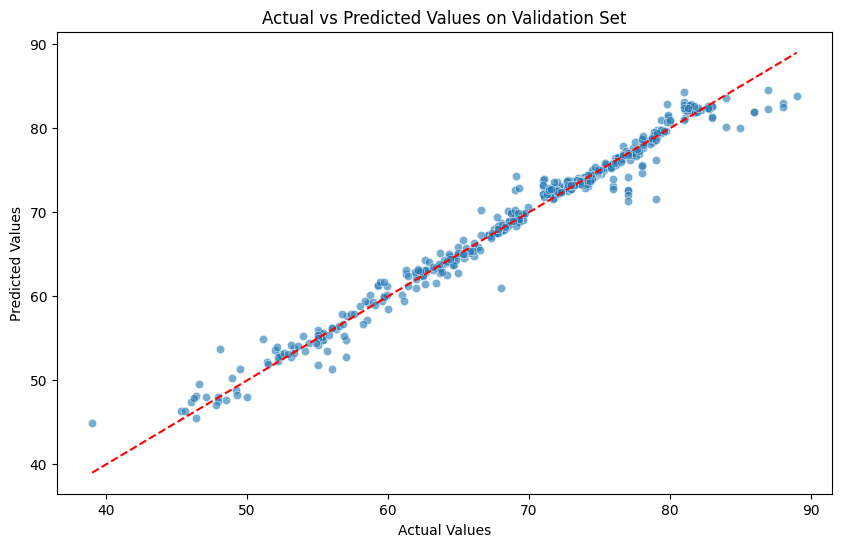

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_val, y=y_val_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values on Validation Set')
plt.show()

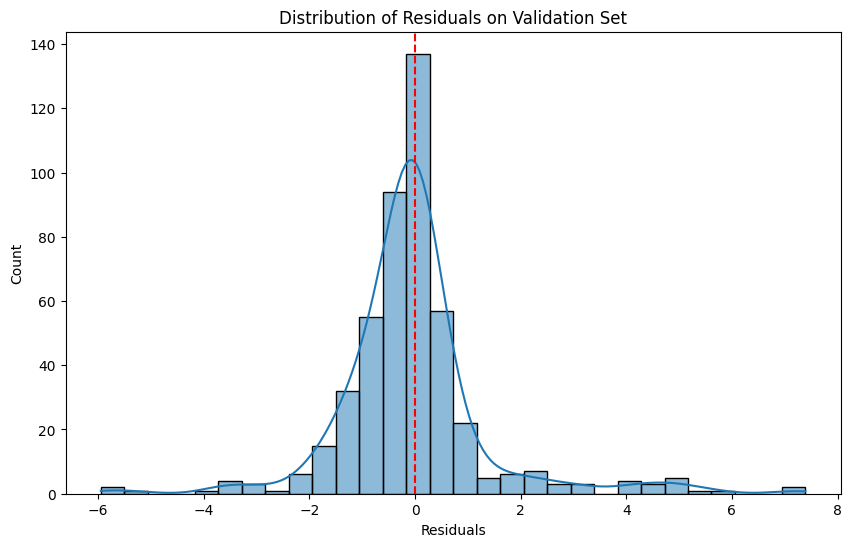

In [18]:
residuals = y_val - y_val_pred

plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals on Validation Set')
plt.show()

Residuals are most likely follow normal curve.

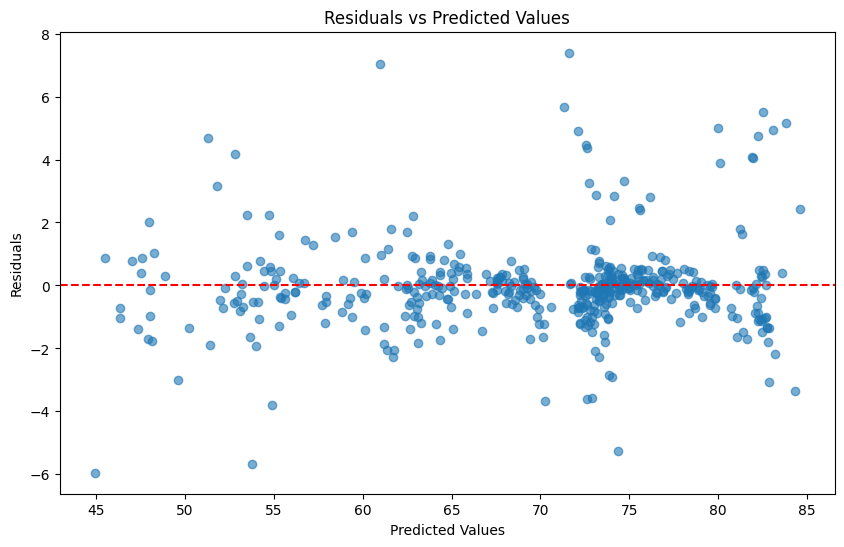

In [19]:
residuals = y_val - y_val_pred

plt.figure(figsize=(10,6))
plt.scatter(y_val_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

Match training columns with test columns

In [20]:
country_list = X_train_full['country'].unique().tolist()
numerical_cols = X_train_full.select_dtypes(include=['float64', 'int64']).columns.tolist()
cols_with_null = [
    col for col in numerical_cols 
    if col in X_test.columns and X_test[col].isna().any()
]

for country in country_list:
    if country in X_test['country'].values:
        X_test.loc[X_test['country'] == country, cols_with_null] = X_test.loc[X_test['country'] == country, cols_with_null].interpolate()
    
for col in numerical_cols:
    if col in X_test.columns:
        X_test[col] = X_test[col].fillna(X_train_full[col].mean())
   

In [21]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588 entries, 90 to 1937
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 588 non-null    object 
 1   year                    588 non-null    int64  
 2   status                  588 non-null    object 
 3   adult mortality         588 non-null    float64
 4   infant deaths           588 non-null    int64  
 5   alcohol                 588 non-null    float64
 6   percentage expenditure  588 non-null    float64
 7   hepatitis b             588 non-null    float64
 8   measles                 588 non-null    int64  
 9   bmi                     588 non-null    float64
 10  under-five deaths       588 non-null    int64  
 11  polio                   588 non-null    float64
 12  total expenditure       588 non-null    float64
 13  diphtheria              588 non-null    float64
 14  hiv/aids                588 non-null    float

Apply Preprocessors on test data

In [22]:
with open('../models/encoded_country.pkl', 'rb') as f:
    country_encoder = pickle.load(f)

In [23]:
X_test["thinness"] = X_test[["thinness 10-19 years", "thinness 5-9 years"]].mean(axis=1)

In [24]:
X_test['encoded_country'] = X_test['country'].map(country_encoder)

In [25]:
X_test.drop(columns=['country', "thinness 10-19 years", "thinness 5-9 years"] + drop_columns, inplace=True)

In [26]:
X_test.isnull().sum()

year                 0
adult mortality      0
alcohol              0
hepatitis b          0
measles              0
bmi                  0
under-five deaths    0
polio                0
total expenditure    0
diphtheria           0
hiv/aids             0
gdp                  0
schooling            0
thinness             0
encoded_country      2
dtype: int64

Still has 2 empty values for encoded country, so we handle this by encoding it with the global mean.

In [35]:
global_mean = np.mean(country_encoder.values)
X_test['encoded_country'] = X_test['encoded_country'].fillna(global_mean)

In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588 entries, 90 to 1937
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               588 non-null    int64  
 1   adult mortality    588 non-null    float64
 2   alcohol            588 non-null    float64
 3   hepatitis b        588 non-null    float64
 4   measles            588 non-null    int64  
 5   bmi                588 non-null    float64
 6   under-five deaths  588 non-null    int64  
 7   polio              588 non-null    float64
 8   total expenditure  588 non-null    float64
 9   diphtheria         588 non-null    float64
 10  hiv/aids           588 non-null    float64
 11  gdp                588 non-null    float64
 12  schooling          588 non-null    float64
 13  thinness           588 non-null    float64
 14  encoded_country    588 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 73.5 KB


In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1880 entries, 2316 to 309
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               1880 non-null   int64  
 1   adult mortality    1880 non-null   float64
 2   alcohol            1880 non-null   float64
 3   hepatitis b        1880 non-null   float64
 4   measles            1880 non-null   int64  
 5   bmi                1880 non-null   float64
 6   under-five deaths  1880 non-null   int64  
 7   polio              1880 non-null   float64
 8   total expenditure  1880 non-null   float64
 9   diphtheria         1880 non-null   float64
 10  hiv/aids           1880 non-null   float64
 11  gdp                1880 non-null   float64
 12  schooling          1880 non-null   float64
 13  thinness           1880 non-null   float64
 14  encoded_country    1880 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 235.0 KB


In [43]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 588 entries, 90 to 1937
Series name: life expectancy
Non-Null Count  Dtype  
--------------  -----  
586 non-null    float64
dtypes: float64(1)
memory usage: 9.2 KB


In [44]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588 entries, 90 to 1937
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               588 non-null    int64  
 1   adult mortality    588 non-null    float64
 2   alcohol            588 non-null    float64
 3   hepatitis b        588 non-null    float64
 4   measles            588 non-null    int64  
 5   bmi                588 non-null    float64
 6   under-five deaths  588 non-null    int64  
 7   polio              588 non-null    float64
 8   total expenditure  588 non-null    float64
 9   diphtheria         588 non-null    float64
 10  hiv/aids           588 non-null    float64
 11  gdp                588 non-null    float64
 12  schooling          588 non-null    float64
 13  thinness           588 non-null    float64
 14  encoded_country    588 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 73.5 KB


Now that test columns matches the train columns exactly and there are no null values we can now use the final model with the test data. 

NOTE: Make sure y_test also dont contain null values.

In [45]:
mask = y_test.notna()
X_test_clean = X_test[mask]
y_test_clean = y_test[mask]

y_test_pred = final_model.predict(X_test_clean)

r2_score = r2_score(y_test_clean, y_test_pred)
rmse_score = np.sqrt(mean_squared_error(y_test_clean, y_test_pred))

print(f"Test R2: {r2_score:.4f}, Test RMSE: {rmse_score:.4f}")

Test R2: 0.9599, Test RMSE: 1.8105


The catboost model performs exellently on unseen data.

Checkpoint

In [ ]:
with open('../models/final_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)